In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)


In [67]:
index_names=['unit_nr','time_cycles','setting_1', 'setting_2', 'setting_3']
sensor_names=['s'+str(i) for i in range(1,22)]
col_names=index_names+sensor_names
print(col_names)

df=pd.read_csv('train_FD001.txt',sep='\s+',header=None, names= col_names)
df.head()

['unit_nr', 'time_cycles', 'setting_1', 'setting_2', 'setting_3', 's1', 's2', 's3', 's4', 's5', 's6', 's7', 's8', 's9', 's10', 's11', 's12', 's13', 's14', 's15', 's16', 's17', 's18', 's19', 's20', 's21']


,unit_nr,time_cycles,setting_1,setting_2,setting_3,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,21.61,554.36,2388.06,9046.19,1.3,47.47,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,21.61,553.75,2388.04,9044.07,1.3,47.49,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,21.61,554.26,2388.08,9052.94,1.3,47.27,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,21.61,554.45,2388.11,9049.48,1.3,47.13,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,21.61,554.00,2388.06,9055.15,1.3,47.28,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


In [5]:
df['unit_nr'].unique().size


100

In [6]:
df.groupby('unit_nr')['time_cycles'].max()

unit_nr
1      192
2      287
3      179
4      189
5      269
6      188
7      259
8      150
9      201
10     222
11     240
12     170
13     163
14     180
15     207
16     209
17     276
18     195
19     158
20     234
21     195
22     202
23     168
24     147
25     230
26     199
27     156
28     165
29     163
30     194
31     234
32     191
33     200
34     195
35     181
36     158
37     170
38     194
39     128
40     188
41     216
42     196
43     207
44     192
45     158
46     256
47     214
48     231
49     215
50     198
51     213
52     213
53     195
54     257
55     193
56     275
57     137
58     147
59     231
60     172
61     185
62     180
63     174
64     283
65     153
66     202
67     313
68     199
69     362
70     137
71     208
72     213
73     213
74     166
75     229
76     210
77     154
78     231
79     199
80     185
81     240
82     214
83     293
84     267
85     188
86     278
87     178
88     213
89     217
90     154
91

In [ ]:
### Looking at the standard deviations of settings 1 and 2, they aren’t completely stable. The fluctuations are so small however, that no other operating conditions can be identified.

In [7]:
df[['setting_1', 'setting_2', 'setting_3']].describe()

,setting_1,setting_2,setting_3
count,20631.000000,20631.000000,20631.0
mean,-0.000009,0.000002,100.0
std,0.002187,0.000293,0.0
min,-0.008700,-0.000600,100.0
25%,-0.001500,-0.000200,100.0
50%,0.000000,0.000000,100.0
75%,0.001500,0.000300,100.0
max,0.008700,0.000600,100.0


In [ ]:
### By looking at the standard deviation it’s clear sensors 1, 10, 18 and 19 do not fluctuate at all, these can be safely discarded as they hold no useful information. 

In [8]:
df[sensor_names].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
s1,20631.0,518.670000,6.537152e-11,518.6700,518.6700,518.6700,518.6700,518.6700
s2,20631.0,642.680934,5.000533e-01,641.2100,642.3250,642.6400,643.0000,644.5300
s3,20631.0,1590.523119,6.131150e+00,1571.0400,1586.2600,1590.1000,1594.3800,1616.9100
s4,20631.0,1408.933782,9.000605e+00,1382.2500,1402.3600,1408.0400,1414.5550,1441.4900
s5,20631.0,14.620000,3.394700e-12,14.6200,14.6200,14.6200,14.6200,14.6200
s6,20631.0,21.609803,1.388985e-03,21.6000,21.6100,21.6100,21.6100,21.6100
s7,20631.0,553.367711,8.850923e-01,549.8500,552.8100,553.4400,554.0100,556.0600
s8,20631.0,2388.096652,7.098548e-02,2387.9000,2388.0500,2388.0900,2388.1400,2388.5600
s9,20631.0,9065.242941,2.208288e+01,9021.7300,9053.1000,9060.6600,9069.4200,9244.5900
s10,20631.0,1.300000,4.660829e-13,1.3000,1.3000,1.3000,1.3000,1.3000


### Computing RUL

In [68]:
EOL=[]
for i in df['unit_nr']:
     EOL.append(df[df.unit_nr==i]['time_cycles'].iloc[-1])
df['EOL']=EOL
df['RUL']=df['EOL']-df['time_cycles']
df.drop(columns=['EOL'],inplace=True)

    

### Plot

The histogram reconfirms most engines break down around 200 cycles. Furthermore, the distribution is right skewed, with few engines lasting over 300 cycles.

Text(0, 0.5, 'frequency')

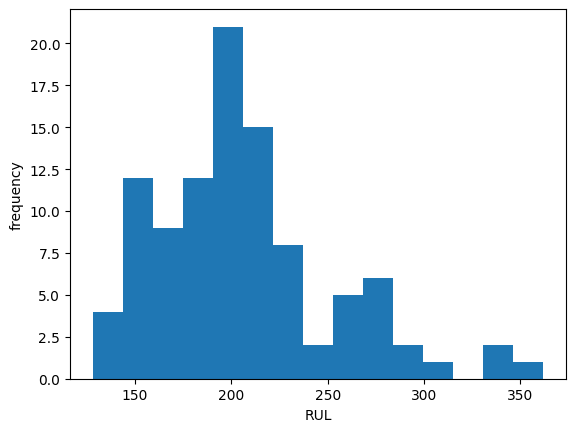

In [10]:
plt.hist(df.groupby('unit_nr')['time_cycles'].max(),bins=15)
plt.xlabel('RUL')
plt.ylabel('frequency')

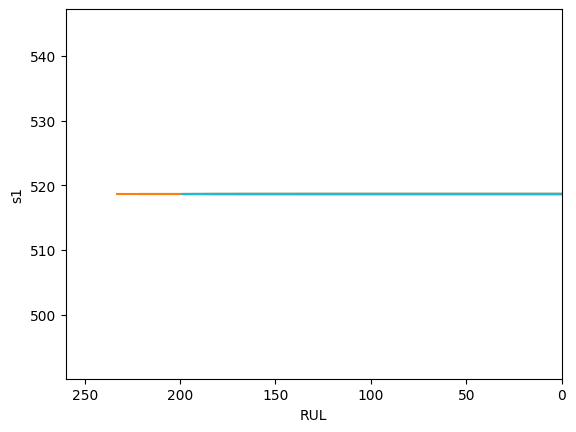

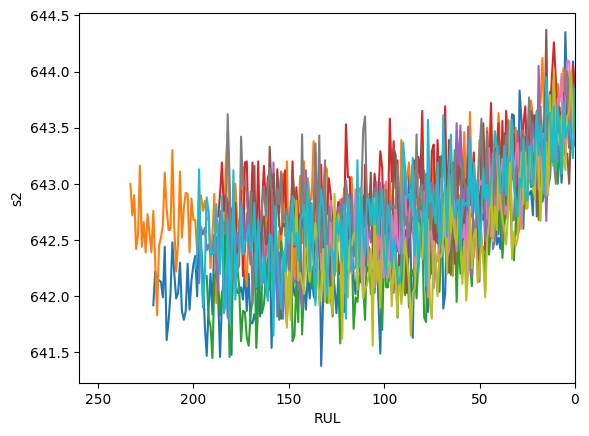

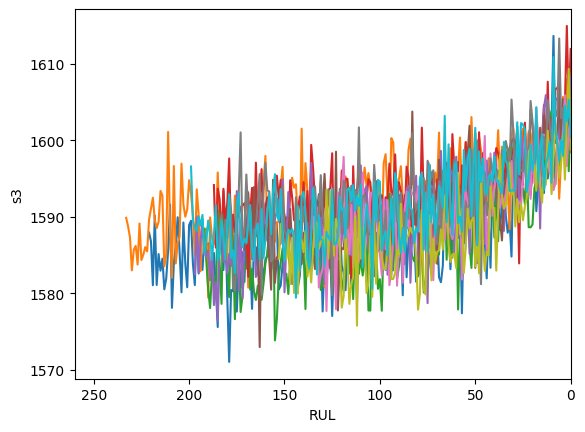

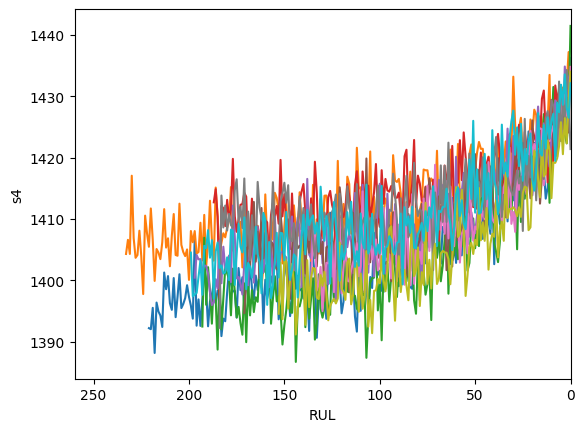

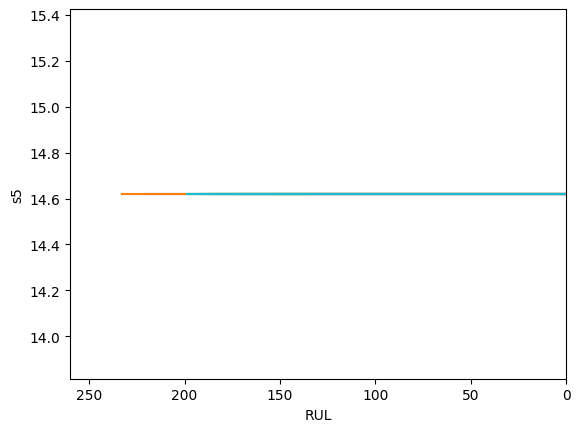

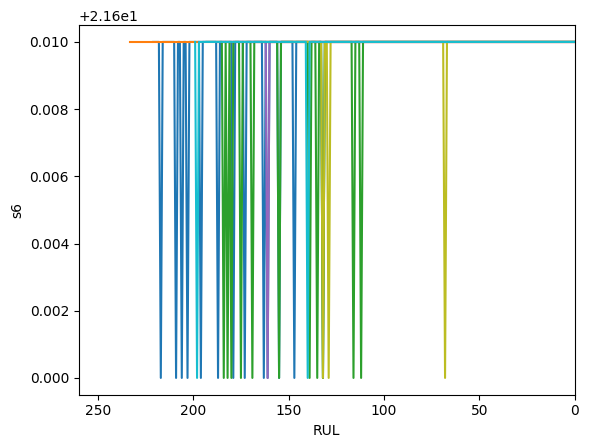

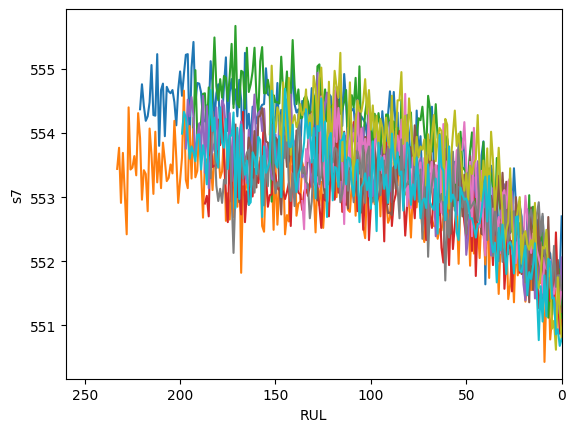

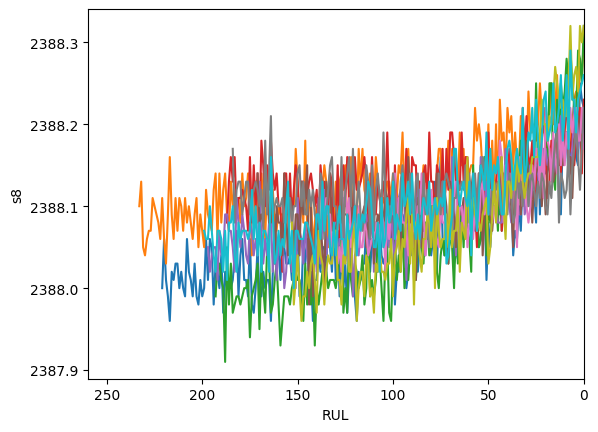

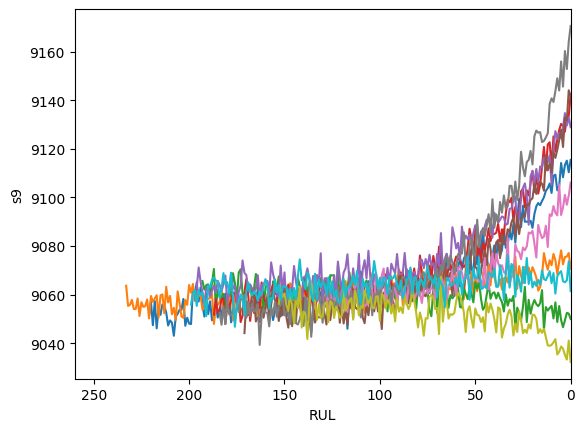

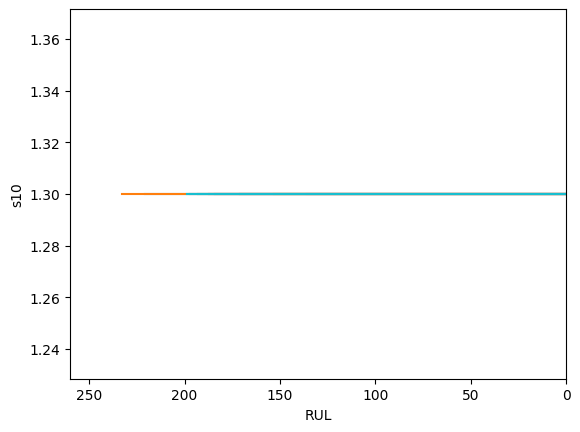

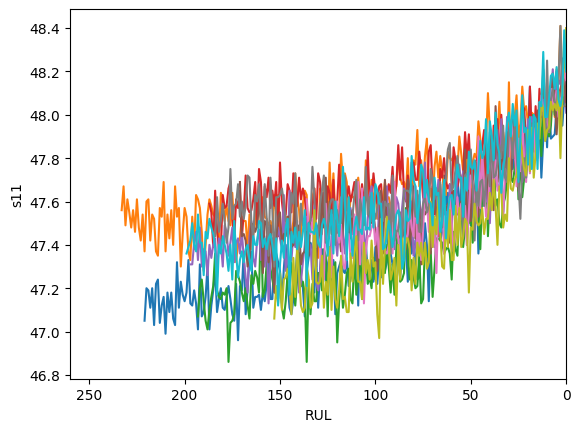

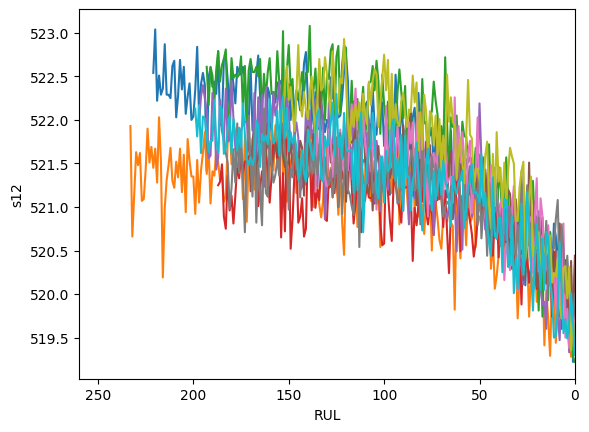

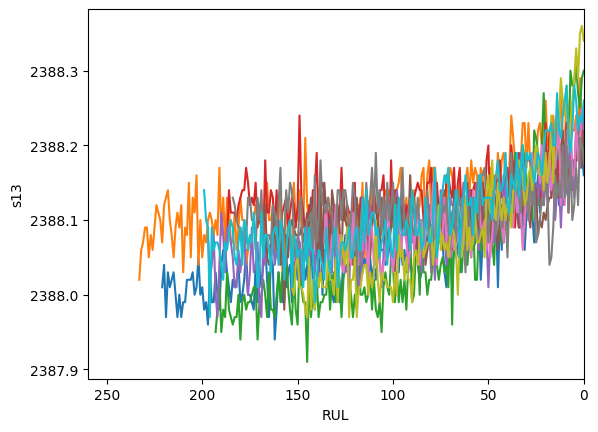

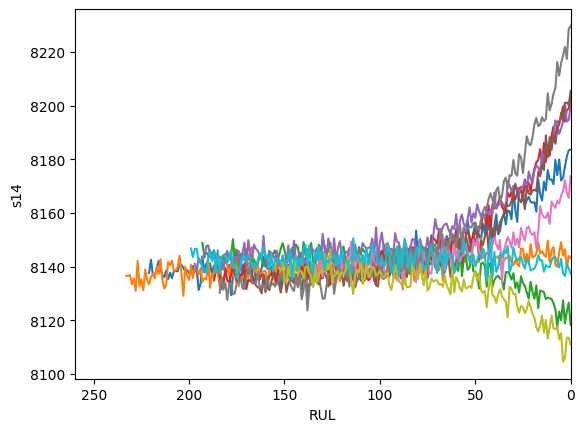

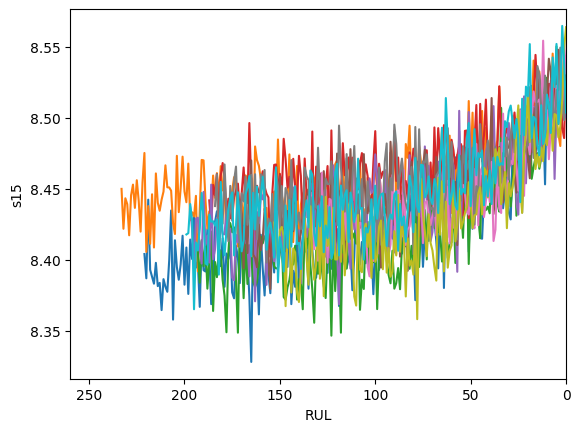

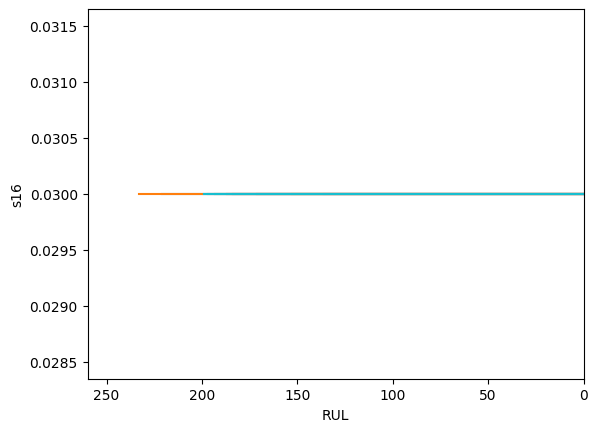

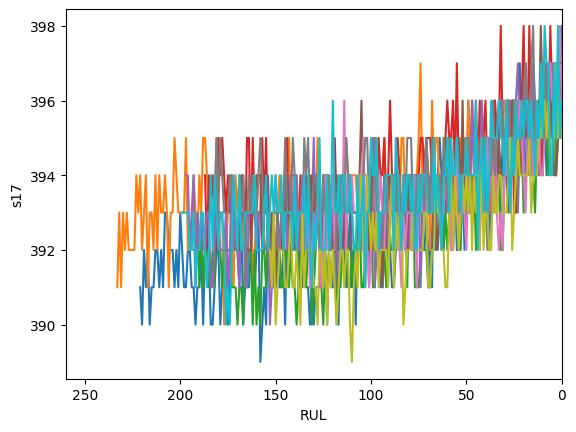

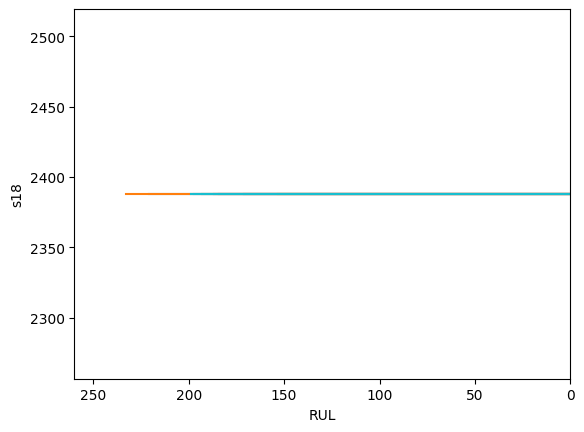

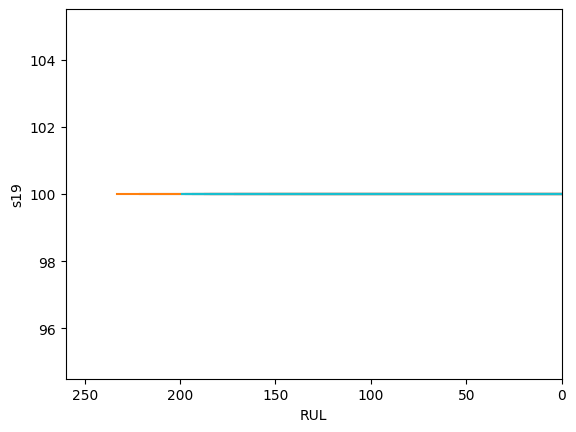

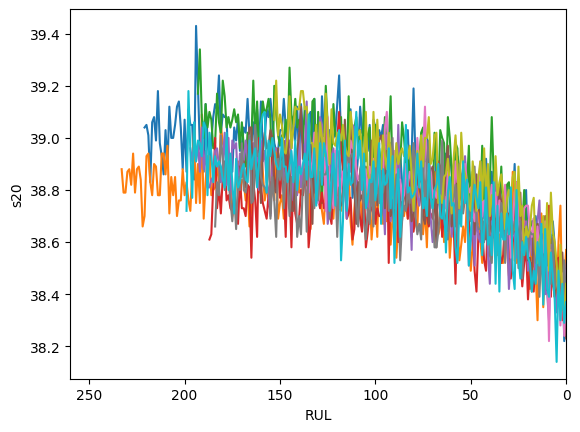

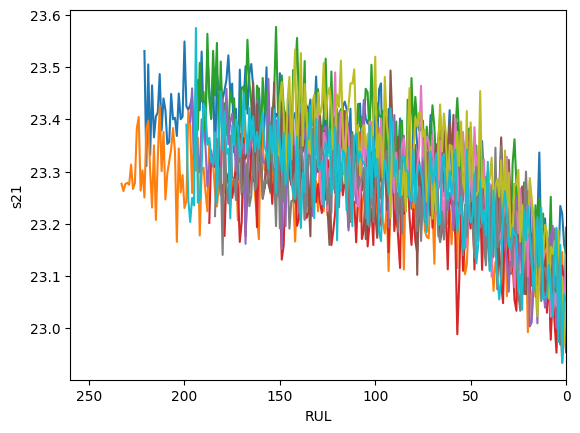

In [11]:
def plot_sensor(sensor):
    for i in df['unit_nr'].unique():
        if i%10==0:
            plt.plot(df[df['unit_nr']==i]['RUL'],df[df['unit_nr']==i][sensor])
    plt.xlim(260,0)
    plt.xlabel('RUL')
    plt.ylabel(sensor)
    plt.show()

for sensor in sensor_names:
    plot_sensor(sensor)

### stats

In [12]:
df.corr()

,unit_nr,time_cycles,setting_1,setting_2,setting_3,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21,RUL
unit_nr,1.000000,0.078753,-0.017895,-0.006197,NaN,NaN,0.014133,0.012621,0.026116,NaN,0.026431,-0.032073,0.039929,-0.052053,NaN,0.024707,-0.031882,0.044230,-0.059473,0.022486,NaN,0.013513,NaN,NaN,-0.020589,-0.016465,0.078753
time_cycles,0.078753,1.000000,-0.004527,0.016132,NaN,NaN,0.549898,0.543947,0.624577,NaN,0.105980,-0.595914,0.475977,0.443999,NaN,0.634385,-0.611354,0.477523,0.370324,0.588676,NaN,0.566995,NaN,NaN,-0.583597,-0.585923,-0.736241
setting_1,-0.017895,-0.004527,1.000000,0.011660,NaN,NaN,0.009030,-0.005651,0.009544,NaN,-0.001340,-0.009437,-0.000427,-0.004279,NaN,0.011658,-0.001491,0.002318,-0.004469,0.007652,NaN,0.002599,NaN,NaN,-0.005713,-0.014559,-0.003198
setting_2,-0.006197,0.016132,0.011660,1.000000,NaN,NaN,0.007266,0.009068,0.014673,NaN,0.014355,-0.016678,0.013285,-0.005425,NaN,0.011690,-0.010923,0.018156,-0.006310,0.014156,NaN,0.012280,NaN,NaN,-0.010554,-0.007846,-0.001948
setting_3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
s1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
s2,0.014133,0.549898,0.009030,0.007266,NaN,NaN,1.000000,0.602610,0.714949,NaN,0.132242,-0.702136,0.662325,0.273764,NaN,0.740020,-0.724578,0.661792,0.179752,0.675975,NaN,0.629886,NaN,NaN,-0.661841,-0.668050,-0.606484
s3,0.012621,0.543947,-0.005651,0.009068,NaN,NaN,0.602610,1.000000,0.678413,NaN,0.116039,-0.664595,0.602481,0.322964,NaN,0.695900,-0.680307,0.600963,0.237137,0.639921,NaN,0.600017,NaN,NaN,-0.625941,-0.633901,-0.584520
s4,0.026116,0.624577,0.009544,0.014673,NaN,NaN,0.714949,0.678413,1.000000,NaN,0.150480,-0.793130,0.746852,0.297429,NaN,0.830136,-0.815591,0.745158,0.190748,0.758459,NaN,0.703499,NaN,NaN,-0.748067,-0.745193,-0.678948
s5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot: >

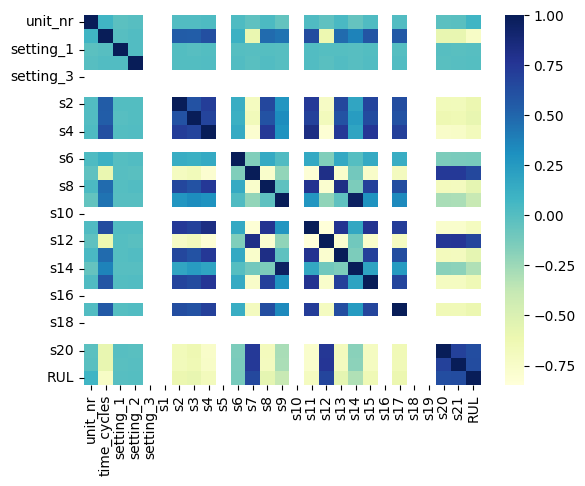

In [13]:
import seaborn as sns

sns.heatmap(df.corr(),cmap="YlGnBu")

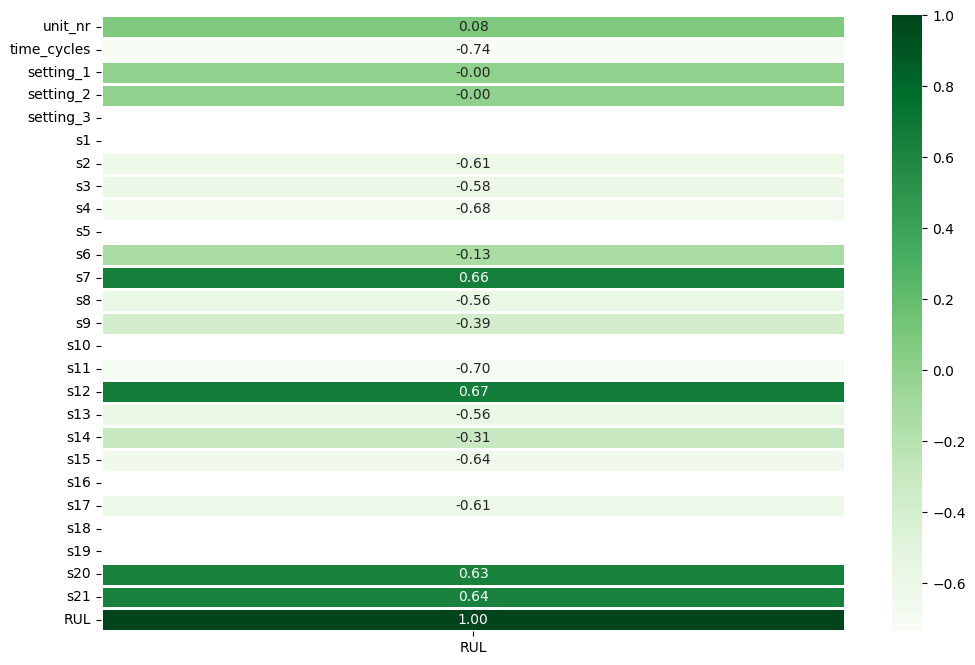

In [14]:

# Plot the correlation of all features with RUL
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr()['RUL'].to_frame(), annot=True, cmap='Greens', fmt='.2f', cbar=True, linewidths=1)

plt.show()


In [69]:
### drop col with low std or corr<20% with RUL

df.drop(['setting_1','setting_2','setting_3','s1','s5','s6','s10','s16','s18','s19'],axis=1,inplace=True)

In [ ]:
#The distribution of normal samples (RUL above 130 cycles) and anomaly samples (RUL below 20 cycles). The measurements of anomaly samples exhibit a shift towards higher or lower values.

<AxesSubplot: xlabel='s2', ylabel='Density'>

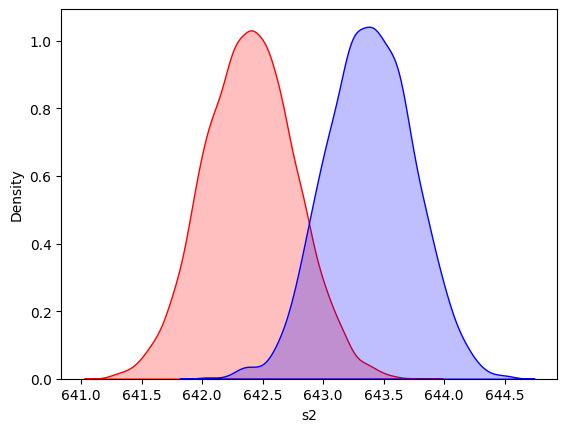

In [16]:
healthy_df=df[df['RUL']>=130]
degraded_df=df[df['RUL']<30]

sns.kdeplot(healthy_df['s2'],fill=True,color='r')

sns.kdeplot(degraded_df['s2'],fill=True,color='b')

<AxesSubplot: xlabel='s7', ylabel='Density'>

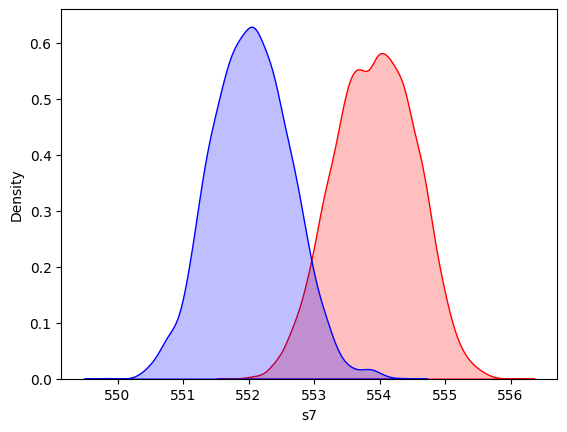

In [17]:
healthy_df=df[df['RUL']>=130]
degraded_df=df[df['RUL']<30]

sns.kdeplot(healthy_df['s7'],fill=True,color='r')

sns.kdeplot(degraded_df['s7'],fill=True,color='b')

### Moving median filter

In [70]:
sensors=df.columns[2:-1]
sensors

Index(['s2', 's3', 's4', 's7', 's8', 's9', 's11', 's12', 's13', 's14', 's15',
       's17', 's20', 's21'],
      dtype='object')

In [71]:

# List of sensor columns (assuming your sensor columns start from index 2)
sensors = df.columns[2:-1]  # Adjust this if your sensor columns have a different index range

# Iterate over each engine ID
for engine_id in df['unit_nr'].unique():
    # Filter data for the current engine
    engine_data = df[df['unit_nr'] == engine_id]
    # Apply rolling median for each sensor
    for sensor in sensors:
        # Apply rolling median to each sensor column for the current engine
        engine_data[sensor] = engine_data[sensor].rolling(window=30, min_periods=1).median() # window= int(engine_data.shape[0] *0.15)
    
    # Update the original dataframe with the processed data
    df.loc[df['unit_nr'] == engine_id, sensors] = engine_data[sensors]

# Now df has the rolling median applied to each sensor for each engine


C:\Users\deeks\AppData\Local\Temp\ipykernel_32796\1821287078.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  engine_data[sensor] = engine_data[sensor].rolling(window=30, min_periods=1).median() # window= int(engine_data.shape[0] *0.15)


In [20]:
df.iloc[:,2:-1].head()

,s2,s3,s4,s7,s8,s9,s11,s12,s13,s14,s15,s17,s20,s21
0,641.820,1589.700,1400.600,554.360,2388.06,9046.190,47.47,521.66,2388.020,8138.620,8.41950,392.0,39.060,23.41900
1,641.985,1590.760,1401.870,554.055,2388.05,9045.130,47.48,521.97,2388.045,8135.055,8.42565,392.0,39.030,23.42130
2,642.150,1589.700,1403.140,554.260,2388.06,9046.190,47.47,522.28,2388.030,8133.230,8.41950,392.0,39.000,23.41900
3,642.250,1588.845,1402.505,554.310,2388.07,9047.835,47.37,522.35,2388.050,8133.530,8.41865,392.0,38.975,23.39645
4,642.350,1587.990,1403.140,554.260,2388.06,9049.480,47.28,522.28,2388.040,8133.800,8.41950,392.0,38.950,23.40440


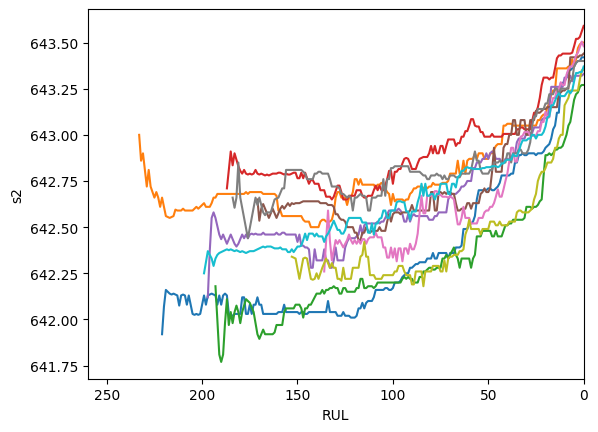

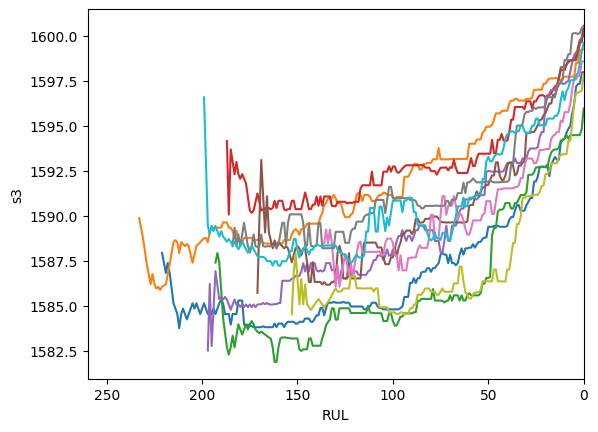

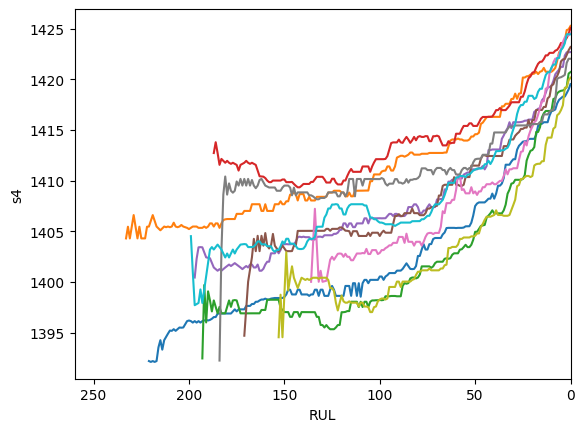

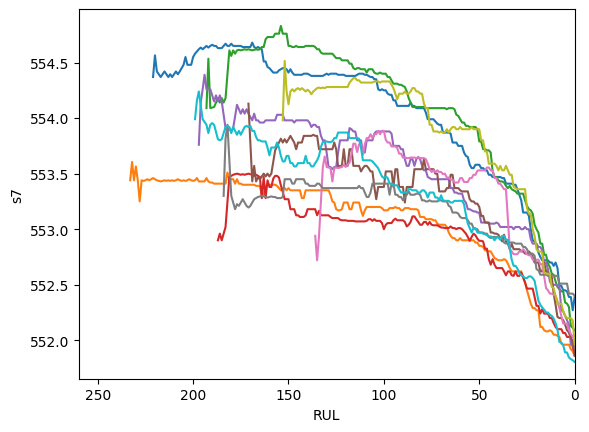

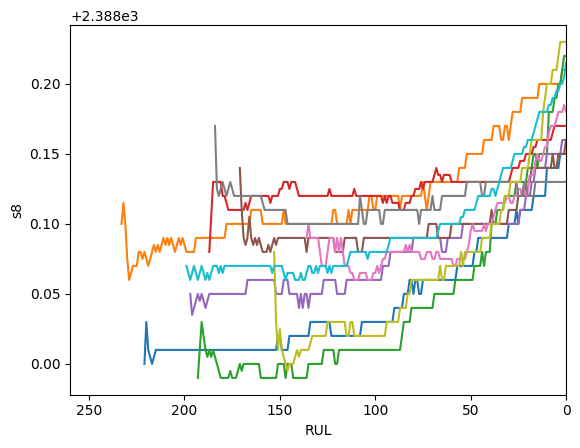

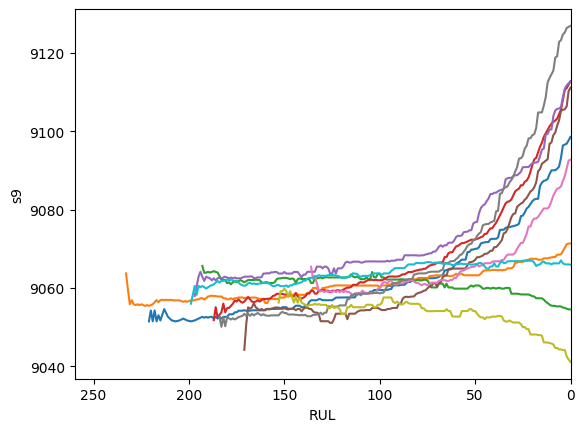

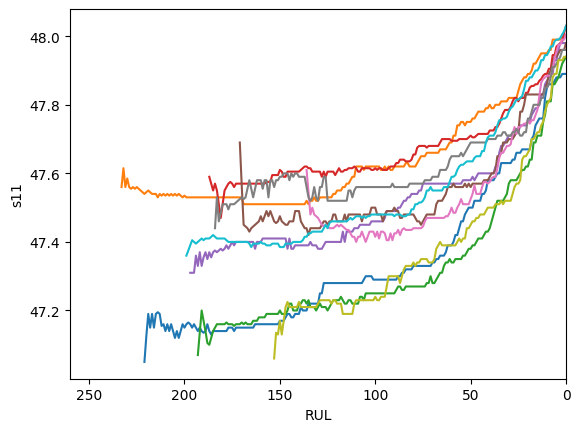

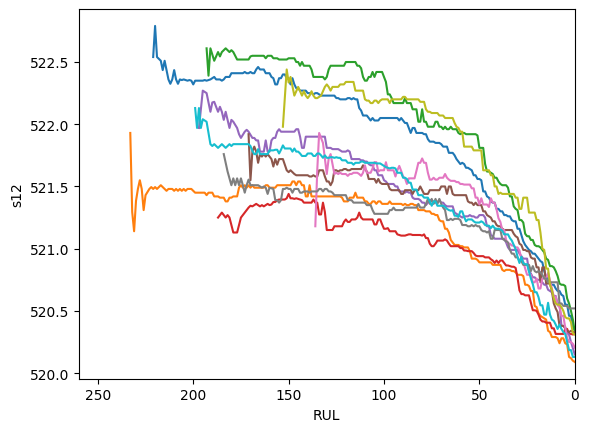

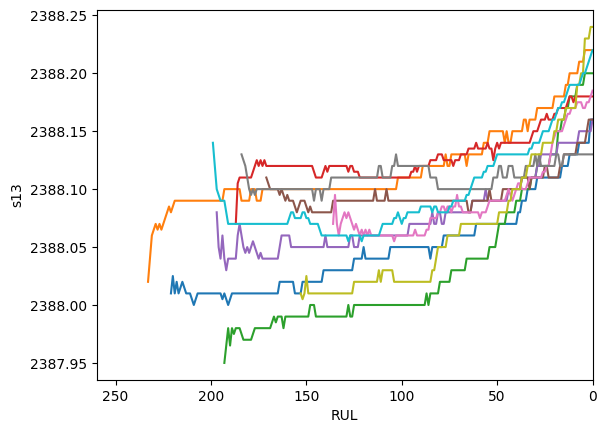

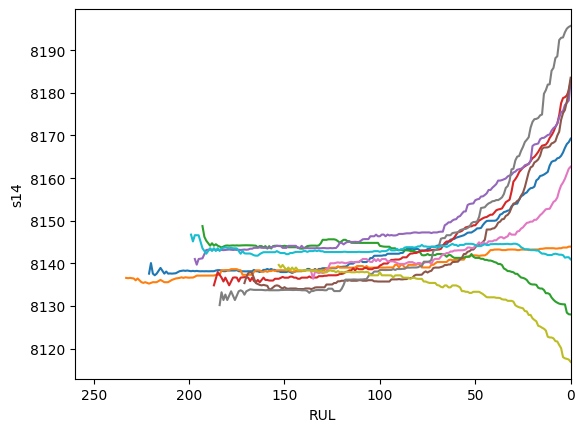

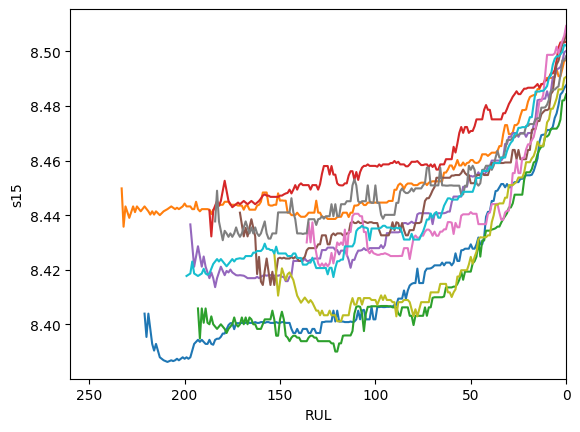

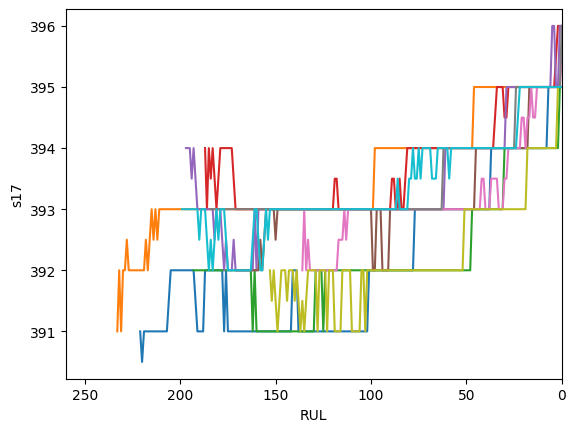

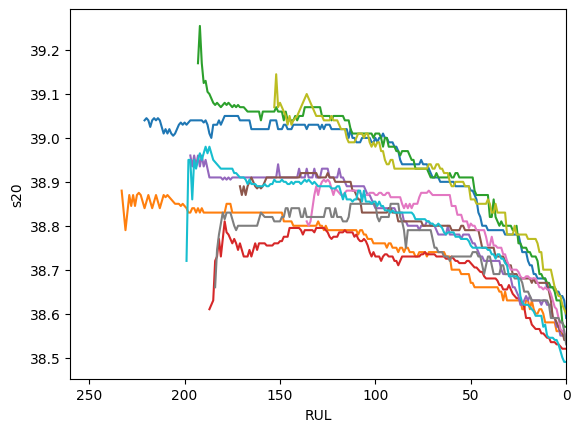

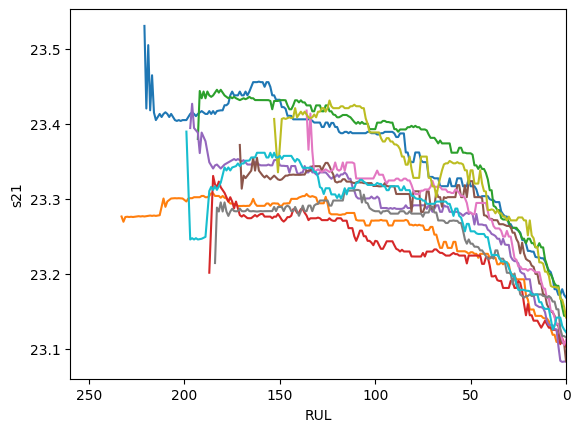

In [21]:
for sensor in sensors:
    plot_sensor(sensor)

### Std normalization

In [22]:
df.columns[2:-1]

Index(['s2', 's3', 's4', 's7', 's8', 's9', 's11', 's12', 's13', 's14', 's15',
       's17', 's20', 's21'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler
scaler = MinMaxScaler()

# Create an empty DataFrame for the normalized data
df_norm = pd.DataFrame()

# Iterate over each engine ID and normalize the sensor values
for engine_id in df['unit_nr'].unique():
    # Filter the data for the current engine
    engine_data = df[df['unit_nr'] == engine_id]
    
    # Normalize the sensor data (columns from index 2 to -1, assuming these are sensor columns)
    normalized_sensors = scaler.fit_transform(engine_data.iloc[:, 2:-1])
    
    # Create a DataFrame with normalized sensor data
    normalized_df = pd.DataFrame(normalized_sensors, columns=df.columns[2:-1])
    
    # Add the 'engine_id', 'RUL', and 'time_cycles' columns back
    normalized_df['engine_id'] = engine_data['unit_nr'].values
    normalized_df['RUL'] = engine_data['RUL'].values
    normalized_df['time_cycles'] = engine_data['time_cycles'].values
    
    # Append the normalized data for this engine to the final DataFrame
    df_norm = pd.concat([df_norm, normalized_df], ignore_index=True)

